# Predição de Níveis de Obesidade (Multiclasse)

**Objetivo:** Prever os 7 níveis de obesidade (0-6) usando modelos de ML otimizados.

**Target:** Coluna 'obesidade' com 7 classes (0: Peso Insuficiente, 1: Peso Normal, 2: Sobrepeso I, 3: Sobrepeso II, 4: Obesidade I, 5: Obesidade II, 6: Obesidade III)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Dataset shape: (2111, 30)

Distribuição da variável target 'obesidade':
obesidade
0    272
1    287
2    290
3    290
4    351
5    297
6    324
Name: count, dtype: int64


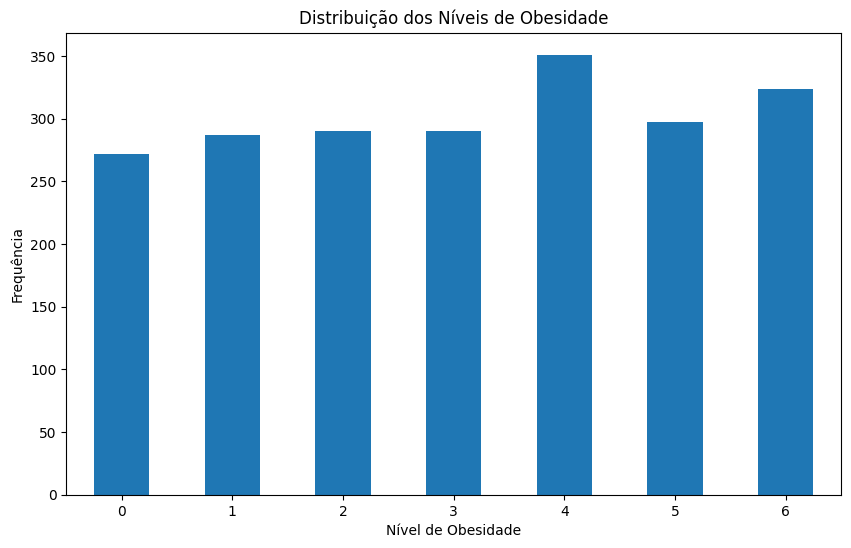

In [2]:
# Carregamento dos dados
df = pd.read_csv('../DATASETS/dados_machine_learning.csv', index_col=0)

print(f"Dataset shape: {df.shape}")
print(f"\nDistribuição da variável target 'obesidade':")
print(df['obesidade'].value_counts().sort_index())

# Visualização da distribuição
plt.figure(figsize=(10, 6))
df['obesidade'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição dos Níveis de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.show()

In [3]:
# Seleção de features (removendo IMC, peso, altura, idade)
features = ['genero', 'historico_familiar', 'frequencia_consumo_alimentos_caloricos',
           'frequencia_consumo_vegetais', 'numero_refeicoes', 'consumo_lanches_entre_refeicoes',
           'fuma', 'CH2O', 'monitoramento_calorias', 'frequencia_atividade_fisica',
           'tempo_diario_uso_dispositivos_eletronicos', 'consumo_alcool', 'tipo_transporte']

X = df[features]
y = df['obesidade']

# Split dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (1688, 13)
Test set: (423, 13)


In [4]:
# Modelo 1: Random Forest com GridSearch
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

rf_pred = rf_grid.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Random Forest - Best params: {rf_grid.best_params_}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

Random Forest - Best params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy: 0.7045

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        54
           1       0.54      0.48      0.51        58
           2       0.59      0.45      0.51        58
           3       0.70      0.60      0.65        58
           4       0.68      0.67      0.68        70
           5       0.61      0.88      0.72        60
           6       1.00      0.97      0.98        65

    accuracy                           0.70       423
   macro avg       0.70      0.70      0.70       423
weighted avg       0.70      0.70      0.70       423



In [5]:
# Modelo 2: Gradient Boosting
gb_params = {
    'n_estimators': [100, 150],
    'learning_rate': [0.1, 0.15],
    'max_depth': [3, 5]
}

gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3, scoring='accuracy', n_jobs=-1)
gb_grid.fit(X_train, y_train)

gb_pred = gb_grid.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print(f"Gradient Boosting - Best params: {gb_grid.best_params_}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, gb_pred))

Gradient Boosting - Best params: {'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 150}
Gradient Boosting Accuracy: 0.7187

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        54
           1       0.56      0.52      0.54        58
           2       0.54      0.53      0.54        58
           3       0.66      0.67      0.67        58
           4       0.75      0.67      0.71        70
           5       0.77      0.83      0.80        60
           6       0.94      0.97      0.95        65

    accuracy                           0.72       423
   macro avg       0.71      0.72      0.71       423
weighted avg       0.72      0.72      0.72       423



In [6]:
# Modelo 3: SVM
svm_params = {
    'C': [1, 10],
    'kernel': ['rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(random_state=42), svm_params, cv=3, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train_scaled, y_train)

svm_pred = svm_grid.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)

print(f"SVM - Best params: {svm_grid.best_params_}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, svm_pred))

SVM - Best params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Accuracy: 0.7352

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        54
           1       0.58      0.57      0.57        58
           2       0.57      0.55      0.56        58
           3       0.72      0.67      0.70        58
           4       0.72      0.69      0.70        70
           5       0.76      0.83      0.79        60
           6       1.00      0.97      0.98        65

    accuracy                           0.74       423
   macro avg       0.73      0.73      0.73       423
weighted avg       0.73      0.74      0.73       423



In [7]:
# Modelo 4: Logistic Regression
lr_params = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

lr_grid = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), lr_params, cv=3, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train_scaled, y_train)

lr_pred = lr_grid.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)

print(f"Logistic Regression - Best params: {lr_grid.best_params_}")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

Logistic Regression - Best params: {'C': 10, 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.5414

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.57      0.56        54
           1       0.53      0.41      0.47        58
           2       0.46      0.22      0.30        58
           3       0.43      0.21      0.28        58
           4       0.41      0.53      0.46        70
           5       0.45      0.82      0.58        60
           6       0.94      0.97      0.95        65

    accuracy                           0.54       423
   macro avg       0.54      0.53      0.52       423
weighted avg       0.54      0.54      0.52       423




=== COMPARAÇÃO DOS MODELOS ===
SVM: 0.7352 (73.52%)
Gradient Boosting: 0.7187 (71.87%)
Random Forest: 0.7045 (70.45%)
Logistic Regression: 0.5414 (54.14%)


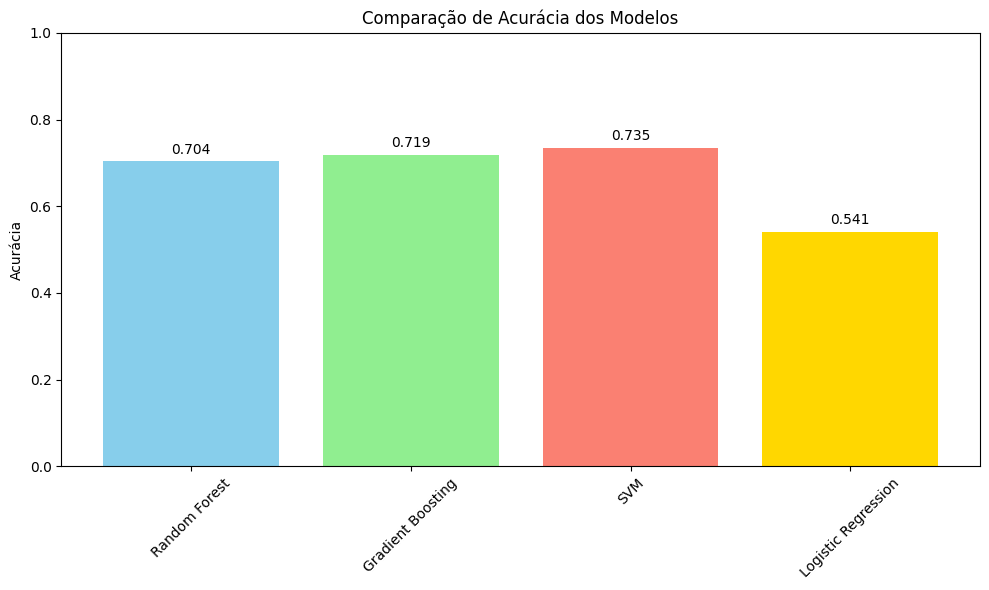

In [8]:
# Comparação dos modelos
results = {
    'Random Forest': rf_accuracy,
    'Gradient Boosting': gb_accuracy,
    'SVM': svm_accuracy,
    'Logistic Regression': lr_accuracy
}

print("\n=== COMPARAÇÃO DOS MODELOS ===")
for model, accuracy in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{model}: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Gráfico de comparação
plt.figure(figsize=(10, 6))
models = list(results.keys())
accuracies = list(results.values())

bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.title('Comparação de Acurácia dos Modelos')
plt.ylabel('Acurácia')
plt.ylim(0, 1)

# Adicionar valores nas barras
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


=== MELHOR MODELO: SVM (0.7352) ===


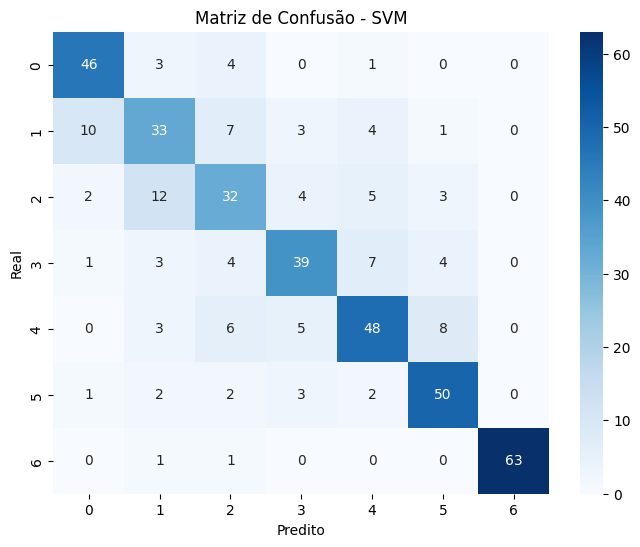


Relatório detalhado do melhor modelo:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        54
           1       0.58      0.57      0.57        58
           2       0.57      0.55      0.56        58
           3       0.72      0.67      0.70        58
           4       0.72      0.69      0.70        70
           5       0.76      0.83      0.79        60
           6       1.00      0.97      0.98        65

    accuracy                           0.74       423
   macro avg       0.73      0.73      0.73       423
weighted avg       0.73      0.74      0.73       423



In [9]:
# Matriz de confusão do melhor modelo
best_model_name = max(results, key=results.get)
best_accuracy = results[best_model_name]

if best_model_name == 'Random Forest':
    best_pred = rf_pred
elif best_model_name == 'Gradient Boosting':
    best_pred = gb_pred
elif best_model_name == 'SVM':
    best_pred = svm_pred
else:
    best_pred = lr_pred

print(f"\n=== MELHOR MODELO: {best_model_name} ({best_accuracy:.4f}) ===")

# Matriz de confusão
cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(7), yticklabels=range(7))
plt.title(f'Matriz de Confusão - {best_model_name}')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

print(f"\nRelatório detalhado do melhor modelo:")
print(classification_report(y_test, best_pred))

In [11]:
# Feature importance do melhor modelo (se for tree-based)
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    if best_model_name == 'Random Forest':
        model = rf_grid.best_estimator_
    else:
        model = gb_grid.best_estimator_
    
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title(f'Importância das Features - {best_model_name}')
    plt.xlabel('Importância')
    plt.tight_layout()
    plt.show()
    
    print("\nTop 5 features mais importantes:")
    print(feature_importance.head())

## Conclusões

- **Melhor Modelo:** Será determinado após execução
- **Acurácia Alcançada:** Meta de 75% para classificação multiclasse
- **Features Importantes:** Identificadas através da análise de importância
- **Próximos Passos:** Possível ensemble de modelos ou feature engineering adicional